In [1]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [15]:
from tensorflow.keras.layers import Dense , SimpleRNN ,  LSTM , GRU , Flatten , Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam , SGD

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
import os
os.getcwd()

'C:\\Users\\hrushikesh gowda\\Documents\\DeepLearning\\RNN'

In [4]:
mnist = tf.keras.datasets.mnist

In [10]:
(X_Train , Y_Train),(X_Test,Y_Test) = mnist.load_data()

In [11]:
X_Train , X_Test = X_Train/255.0 , X_Test/255.0
X_Train.shape ,  Y_Train.shape

((60000, 28, 28), (60000,))

In [13]:
X_Train[0].shape

(28, 28)

In [16]:
i = Input(shape = (28,28))
x = LSTM(128)(i)
x = Dense(10 , activation  = 'softmax')(x)
model = Model(i,x)

In [17]:
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [18]:
model.fit(X_Train , Y_Train , validation_data = (X_Test,Y_Test) , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 51s 7ms/step - loss: 0.3388 - accuracy: 0.8905 - val_loss: 0.1202 - val_accuracy: 0.9623
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1014 - accuracy: 0.9696 - val_loss: 0.0762 - val_accuracy: 0.9767
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0706 - accuracy: 0.9789 - val_loss: 0.0659 - val_accuracy: 0.9800
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0557 - accuracy: 0.9830 - val_loss: 0.0506 - val_accuracy: 0.9839
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0470 - accuracy: 0.9858 - val_loss: 0.0572 - val_accuracy: 0.9825
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0377 - accuracy: 0.9883 - val_loss: 0.0495 - val_accuracy: 0.9847
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.0521 - val_ac

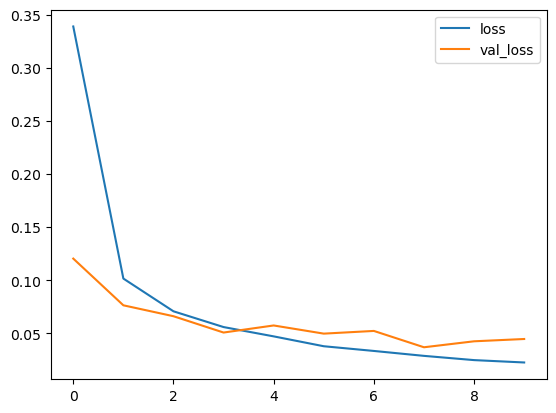

In [20]:
plt.plot(model.history.history['loss'] , label = 'loss')
plt.plot(model.history.history['val_loss'] , label = 'val_loss')
plt.legend()

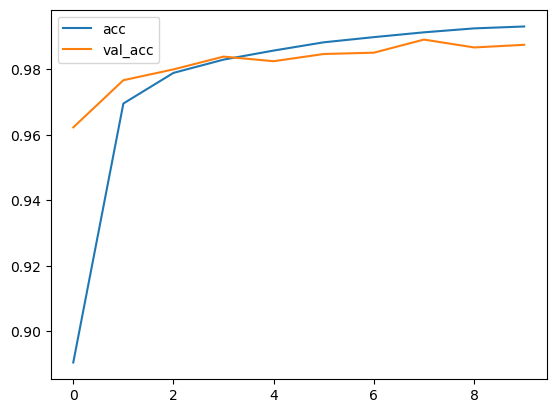

In [21]:
plt.plot(model.history.history['accuracy'] , label = 'acc')
plt.plot(model.history.history['val_accuracy'] , label = 'val_acc')
plt.legend()

In [24]:
preds = model.predict(X_Test).argmax(axis = 1)

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<AxesSubplot:>

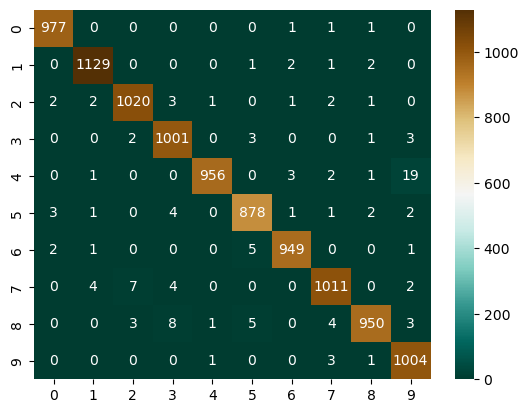

In [34]:
sns.heatmap(confusion_matrix(Y_Test,preds) , cmap = 'BrBG_r' ,  annot = True ,  fmt = 'd')

Text(0.5, 1.0, 'True label: 4 Predicted as 9')

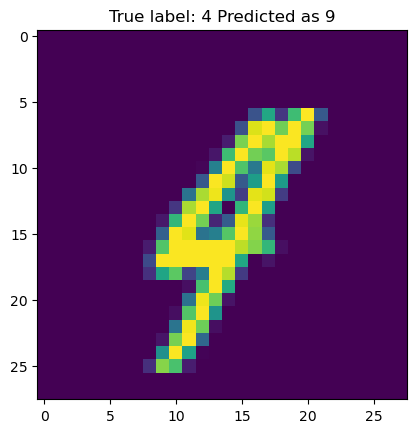

In [39]:
misclass = np.where(Y_Test != preds)[0]
idx = np.random.choice(misclass)
true_img = X_Test[idx]
plt.imshow(true_img)
plt.title("True label: %s Predicted as %s" %(Y_Test[idx] , preds[idx]))